# Bounding box detection - Racoon data


## Data files
- images_racoon.zip: contain images of racoons
- train_labels.csv: contains coordinates for bounding box for every image

### Import the necessary libraries

In [5]:
import numpy as np
import pandas as pd
import os

### Mount to drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Change directory

In [11]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/ComputerVision_R10_Internal_Lab')

In [12]:
os.getcwd

<function posix.getcwd>

### Load the training data from train.csv file

In [14]:
train_df=pd.read_csv('train_labels.csv')

### Print the shape of the train dataset

In [15]:
train_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,raccoon-17.jpg,259,194,raccoon,95,60,167,118
1,raccoon-11.jpg,660,432,raccoon,3,1,461,431
2,raccoon-63.jpg,600,400,raccoon,74,107,280,290
3,raccoon-63.jpg,600,400,raccoon,227,93,403,298
4,raccoon-60.jpg,273,185,raccoon,58,33,197,127


### Declare a variable IMAGE_SIZE = 128 as we will be using MobileNet which will be taking Input shape as 128 * 128 

In [16]:
IMAGE_SIZE = 128

### With the help of csv.reader write a for loop which can load the train.csv file and store the path, width and height, x0, y0, x1, y1 in individual variables. <br>
1. Create a list variable known as 'paths' which has all the path for all the training images
2. Create an array 'coords' which has the resized coordinates of the bounding box for the training images

<u>Note:</u> All the training images should be resized to 128 * 128 as it is the input shape of MobileNet (which we will be using for Object detection). Hence the corresponding coordinates of the bounding boxes should be changed to match the image dimension of 128 * 128 

In [18]:
train_df.shape

(173, 8)

In [46]:
paths=[]
coords=np.zeros((train_df.shape[0],4))


In [47]:
for i, row in train_df.iterrows():
    paths.append(row['filename'])
    coords[i,0] = row['xmin'] * IMAGE_SIZE / row['width']
    coords[i,1] = row['ymin'] * IMAGE_SIZE / row['height']
    coords[i,2] = row['xmax'] * IMAGE_SIZE / row['width']
    coords[i,3] = row['ymax'] * IMAGE_SIZE / row['height']


In [48]:
paths[:10]

['raccoon-17.jpg',
 'raccoon-11.jpg',
 'raccoon-63.jpg',
 'raccoon-63.jpg',
 'raccoon-60.jpg',
 'raccoon-69.jpg',
 'raccoon-180.jpg',
 'raccoon-200.jpg',
 'raccoon-141.jpg',
 'raccoon-19.jpg']

In [49]:
coords[:10]

array([[ 46.94980695,  39.58762887,  82.53281853,  77.8556701 ],
       [  0.58181818,   0.2962963 ,  89.40606061, 127.7037037 ],
       [ 15.78666667,  34.24      ,  59.73333333,  92.8       ],
       [ 48.42666667,  29.76      ,  85.97333333,  95.36      ],
       [ 27.19413919,  22.83243243,  92.36630037,  87.87027027],
       [  7.49268293,   5.72357724, 117.38536585, 124.87804878],
       [ 25.38666667,   6.72      ,  78.50666667, 127.68      ],
       [ 52.47509579,   6.63212435, 122.11494253, 110.09326425],
       [  0.51405622,   0.63366337,  79.16465863, 111.52475248],
       [ 42.996139  ,   5.27835052,  89.94594595,  58.72164948]])

### Write a for loop which can load all the training images into a variable 'batch_images' using the paths from the 'paths' variable
<u>Note:</u> Convert the image to RGB scale as the MobileNet accepts 3 channels as inputs   

In [50]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/ComputerVision_R10_Internal_Lab'

In [51]:
from tensorflow.keras.applications.mobilenet import MobileNet,preprocess_input
from PIL import Image

In [53]:
batch_images= np.zeros((len(paths),IMAGE_SIZE,IMAGE_SIZE,3),dtype=np.float32)

for i,j in enumerate(paths):
  img = Image.open('images/'+j)
  img = img.resize((IMAGE_SIZE,IMAGE_SIZE))
  img = img.convert('RGB')
  batch_images[i] = preprocess_input(np.array(img,dtype=np.float32))

In [56]:
len(paths)

173

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


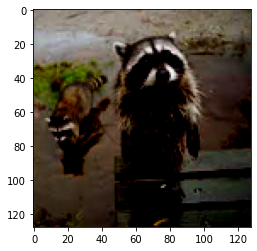

In [62]:
import matplotlib.pyplot as plt
plt.imshow(batch_images[149])

### Import MobileNet and load MobileNet into a variable named 'model' which takes input shape of 128 * 128 * 3.
### Freeze all the layers and Add convolution layers and reshape layers at the end to ensure the output has 4 coordinates.

In [65]:
model = MobileNet(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),include_top=False)

17227776/17225924 [==============================] - 0s 0us/step


In [66]:
model.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32) 

In [67]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D,Reshape

In [68]:
for layer in model.layers:
   layer.trainable = False

X = model.layers[-1].output
X = Conv2D(4,kernel_size=4)(X)
X = Reshape((4,))(X)

model = Model(inputs=model.input,outputs=X)

In [69]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32)        0     

## Plot the model and view the whole skeleton using plot_model.

In [70]:
from tensorflow.keras.utils import plot_model

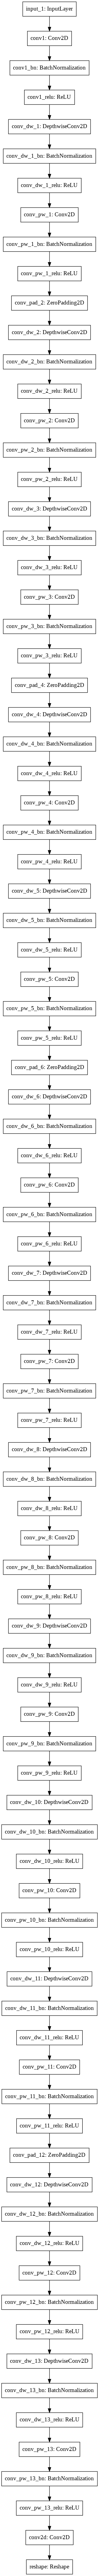

In [71]:
plot_model(model)

### Define a custom loss function IoU which calculates Intersection Over Union

In [75]:
import tensorflow as tf
from tensorflow.keras.backend import epsilon

In [76]:
def loss(gt,pred):
    intersections = 0
    unions = 0
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height
    
    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

#     Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
        if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
            intersections += intersection[j]
            unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + epsilon()), 4)
    iou = iou.astype(np.float32)
    return iou

def IoU(y_true, y_pred):
    iou = tf.compat.v1.py_func(loss, [y_true, y_pred], tf.float32)
    return iou

### Write model.compile function & model.fit function with: <br>
1. Optimizer = Adam, Loss = 'mse' and metrics = IoU
2. Epochs = 30, batch_size = 32, verbose = 1

In [77]:
model.compile(optimizer='Adam',loss='mse',metrics=[IoU])

In [78]:
model.fit(batch_images,coords,batch_size=32,epochs=30,verbose=1)

Epoch 1/30
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
6/6 [==============================] - 4s 282ms/step - loss: 4064.1145 - IoU: 0.0826
Epoch 2/30
6/6 [==============================] - 2s 278ms/step - loss: 767.8029 - IoU: 0.4282
Epoch 3/30
6/6 [==============================] - 2s 290ms/step - loss: 458.8856 - IoU: 0.5776
Epoch 4/30
6/6 [=========================

### Pick a test image from the given data

In [105]:
  img = Image.open('test_racoon.jpg')
  orig_img=Image.open('test_racoon.jpg')

### Resize the image to 128 * 128 and preprocess the image for the MobileNet model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


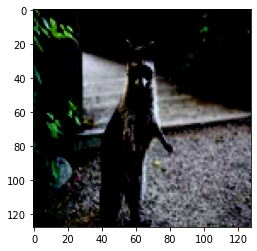

In [106]:
  img = img.resize((IMAGE_SIZE,IMAGE_SIZE))
  img = img.convert('RGB')
  processed_image = preprocess_input(np.array(img,dtype=np.float32))
  plt.imshow(processed_image)

### Predict the coordinates of the bounding box for the given test image

In [114]:
orig_img.size

(311, 162)

In [107]:
np.array(orig_img).shape

(162, 311, 3)

In [108]:
processed_image.shape

(128, 128, 3)

In [109]:
region=model.predict(np.array([processed_image]))

### Plot the test image using .imshow and draw a boundary box around the image with the coordinates obtained from the model

In [118]:
image_width=orig_img.size[0]
image_height=orig_img.size[1]

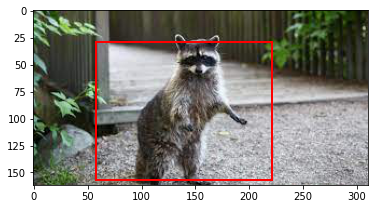

In [119]:
from matplotlib import patches
x0 = int(region[0][0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[0][1] * image_height / IMAGE_SIZE)

x1 = int((region[0][2]) * image_width / IMAGE_SIZE)
y1 = int((region[0][3]) * image_height / IMAGE_SIZE)


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(orig_img)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), (x1 - x0) , (y1 - y0) , linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

# VGG16 Implementation

# VGG 16 Implementation
### Define a variable Image_size which takes accurate input according to the VGG16 model. 

In [168]:
IMAGE_SIZE_V=224

### With the help of csvr.reader write a for loop which can load the train.csv file and store the path, width, height, x0,y0,x1,y1 in induvidual variables. <br>
1. Create a list variable known as 'path' which has all the path for all the training images
2. Create an array 'coords' which has the resized coordinates of the bounding box for the training images

<u>Note:</u> All the training images should be downsampled to 128 * 128 as it is the input shape of MobileNet (which we will be using for Object detection). Hence the corresponding coordinates of the bounding boxes should be changed to match the image dimension of 224 * 224 

In [169]:
paths_v=[]
coords_v=np.zeros((train_df.shape[0],4))

In [170]:
for i, row in train_df.iterrows():
    paths_v.append(row['filename'])
    coords_v[i,0] = row['xmin'] * IMAGE_SIZE_V / row['width']
    coords_v[i,1] = row['ymin'] * IMAGE_SIZE_V / row['height']
    coords_v[i,2] = row['xmax'] * IMAGE_SIZE_V / row['width']
    coords_v[i,3] = row['ymax'] * IMAGE_SIZE_V / row['height']

### Write a for loop which can load all the training images into a variable 'batch_images' using the paths from the 'paths' variable
<u>Note:</u> Convert the image to RGB scale as the VGG16 accepts 3 channels as inputs   

In [171]:
batch_images_v= np.zeros((len(paths),IMAGE_SIZE_V,IMAGE_SIZE_V,3),dtype=np.float32)

for i,j in enumerate(paths):
  img = Image.open('images/'+j)
  img = img.resize((IMAGE_SIZE_V,IMAGE_SIZE_V))
  img = img.convert('RGB')
  batch_images_v[i] = preprocess_input(np.array(img,dtype=np.float32))

### Define a vgg16 model and plot the model using plot_model function.
Hint:- Use RepeatVector,Conv1D,GlobalAveragePooling2D(optional to learner)

In [172]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D,RepeatVector,Conv1D,Flatten

In [173]:
model_v = VGG16(weights='imagenet',input_shape=(IMAGE_SIZE_V,IMAGE_SIZE_V,3),include_top=False)

In [ ]:
model_v.summary()

In [175]:
for layer in model_v.layers:
   layer.trainable = False

x2=model_v.output
x2=GlobalAveragePooling2D()(x2)
x2=RepeatVector(8)(x2)
x2=Conv1D(4,kernel_size=8,name="coords")(x2)
x2=Flatten()(x2)

model_v=Model(inputs=model_v.input,outputs=x2)

### Plot the Vgg16 model using plot_model function.

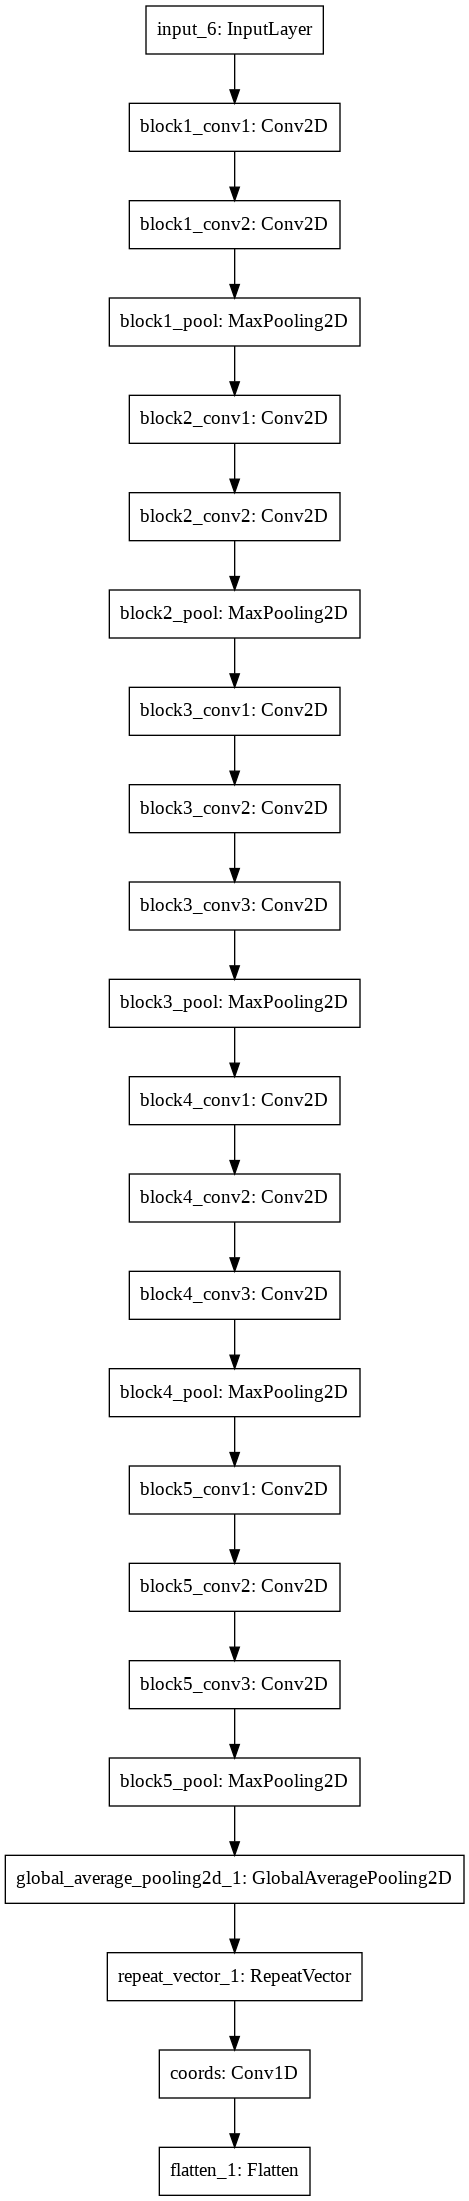

In [176]:
plot_model(model_v)

### Write model.compile function & model.fit function with: <br>
1. Optimizer = Adam, Loss = 'mse' and metrics = IoU
2. Epochs = 30, batch_size = 32, verbose = 1

In [177]:
model_v.compile(optimizer='Adam',loss='mse',metrics=[IoU])

In [178]:
batch_images_v.shape

(173, 224, 224, 3)

In [181]:
model_v.fit(batch_images_v,coords_v,batch_size=32,epochs=10)

Epoch 1/10
6/6 [==============================] - 81s 13s/step - loss: 1227.5957 - IoU: 0.5375
Epoch 2/10
6/6 [==============================] - 79s 13s/step - loss: 1184.0983 - IoU: 0.5476
Epoch 3/10
6/6 [==============================] - 79s 13s/step - loss: 1144.4961 - IoU: 0.5499
Epoch 4/10
6/6 [==============================] - 82s 14s/step - loss: 1110.0244 - IoU: 0.5630
Epoch 5/10
6/6 [==============================] - 79s 13s/step - loss: 1072.5776 - IoU: 0.5703
Epoch 6/10
6/6 [==============================] - 79s 13s/step - loss: 1048.5973 - IoU: 0.5669
Epoch 7/10
6/6 [==============================] - 82s 13s/step - loss: 1020.8737 - IoU: 0.5739
Epoch 8/10
6/6 [==============================] - 80s 13s/step - loss: 991.7263 - IoU: 0.5797
Epoch 9/10
6/6 [==============================] - 79s 13s/step - loss: 970.1719 - IoU: 0.5808
Epoch 10/10
6/6 [==============================] - 81s 13s/step - loss: 944.4818 - IoU: 0.5852


### Pick a test image from the given data

In [182]:
 img = Image.open('test_racoon.jpg')
 orig_img = Image.open('test_racoon.jpg')

### Resize the image to 224 * 224 and preprocess the image for the VGG16

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


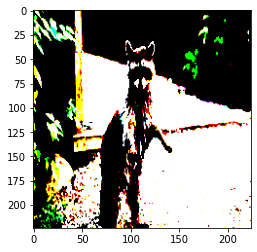

In [183]:
  img = img.resize((IMAGE_SIZE_V,IMAGE_SIZE_V))
  img = img.convert('RGB')
  processed_image = preprocess_input(np.array(img,dtype=np.float32))
  plt.imshow(processed_image)

### Predict the coordinates of the bounding box for the given test image

In [185]:
region=model_v.predict(np.array([processed_image]))

### Plot the test image using .imshow and draw a boundary box around the image with the coordinates obtained from the model

In [186]:
image_width=orig_img.size[0]
image_height=orig_img.size[1]

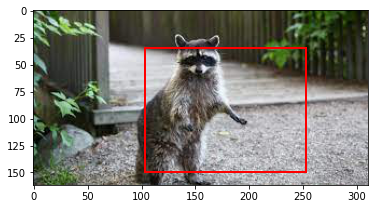

In [187]:
from matplotlib import patches
x0 = int(region[0][0] * image_width / IMAGE_SIZE_V) # Scale the BBox
y0 = int(region[0][1] * image_height / IMAGE_SIZE_V)

x1 = int((region[0][2]) * image_width / IMAGE_SIZE_V)
y1 = int((region[0][3]) * image_height / IMAGE_SIZE_V)


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(orig_img)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), (x1 - x0) , (y1 - y0) , linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()